# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [3]:
import torch
import numpy as np

## Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

Directly from data

Tensors can be created directly from data. The data type is automatically inferred.

In [4]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)
#tensors can run on GPUs or other hardware accelerators

tensor([[1, 2],
        [3, 4]])


## From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see Bridge with NumPy).

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


## From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [6]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8494, 0.5638],
        [0.8823, 0.5612]]) 



## With random or constant values:

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5046, 0.4574, 0.9788],
        [0.3400, 0.3422, 0.6501]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described here.

Each of these operations can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Try out some of the operations from the list. If you’re familiar with the NumPy API, you’ll find the Tensor API a breeze to use.

Standard numpy-like indexing and slicing:

In [10]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joining tensors 
You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining option that is subtly different from torch.cat.

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)


tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [12]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## Single-element tensors
If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [13]:
agg = tensor.sum()
agg_item = agg.item()
print(agg, type(agg))
print(agg_item, type(agg_item))


tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


## In-place operations 
Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [14]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.
Tensor to NumPy array

In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## NumPy array to Tensor

In [17]:
n = np.ones(5)
t = torch.from_numpy(n)


## Changes in the NumPy array reflects in the tensor.

In [18]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: Image Datasets, Text Datasets, and Audio Datasets

## Loading a Dataset

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:

        root is the path where the train/test data is stored,

        train specifies training or test dataset,

        download=True downloads the data from the internet if it’s not available at root.

        transform and target_transform specify the feature and label transformations



In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
from torchaudio import datasets as ta
mus_data_train = ta.MUSDB_HQ(
    root="data",
    subset ="train",
    download=True
)
# data_loader = torch.utils.data.DataLoader(
#     mus_data,
#     batch_size=1,
#     shuffle=True,
#     num_workers=args.nThreads)



mus_data_test = ta.MUSDB_HQ(
    root="data",
    subset ="test",
    download=True
)


## Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

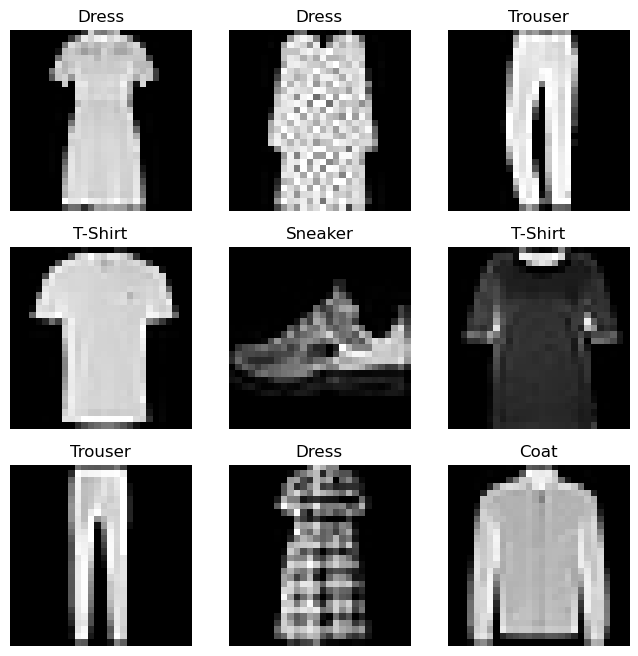

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.

In the next sections, we’ll break down what’s happening in each of these functions.

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## __init__

The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

The labels.csv file looks like:

In [6]:
# tshirt1.jpg, 0
# tshirt2.jpg, 0
# #......
# ankleboot999.jpg, 9

In [7]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

## __len__

The __len__ function returns the number of samples in our dataset.

Example:

In [8]:
def __len__(self):
    return len(self.img_labels)

## __getitem__

The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

In [11]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

## Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


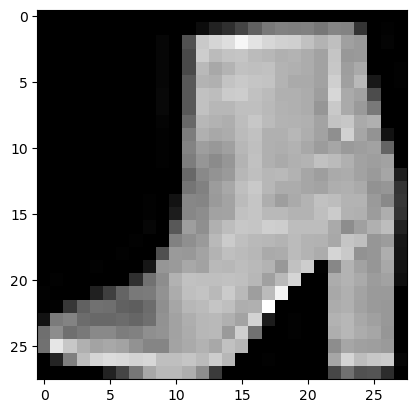

Label: 9


In [13]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [14]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]


## Lambda Transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

In [15]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Neural Networks
When a NNN is learning, it's locally minimizing the cost function using gradient descent, following the decreases in cost for each output to where it levels off.
This learning adjusts the values of the nodes in each layer to acheive an improvement the cost function/output
starting with adjustments to the last hidden layer of nodes for every indivudual element of the cost function, you get a cost vector which improves the conection between that hidden lay and the cost function.
Then, move backwards and adjust that hidden layer for every individual element of the last hidden layer and you get a cost vector which improves the connection between these two hidden layers and so on until the input.
This is called back propogation and you begin to approach the -grad(cost function) hence very dimention gadient descent. strong pathways begin to form from the input all the way to the output. 

The core algorith of NN

# Build a Neural Network

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In the following sections, we’ll build a neural network to classify images in the FashionMNIST dataset.

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get Device for Training

We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Define the Class

When defining our own neural networks, we use a subclass of nn.Module.
We do this using super().
It gives you access to methods in a superclass from the subclass that inherits from it and returns a temporary object of the superclass that then allows you to call that superclass’s methods. 
Why would you want to do any of this? 
While the possibilities are limited by your imagination, a common use case is building classes that extend the functionality of previously built classes. 
 Calling the previously built methods with super() saves you from needing to rewrite those methods in your subclass, and allows you to swap out superclasses with minimal code changes. 

In [ ]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)


Here, you’ve used super() to call the __init__() of the Rectangle class, allowing you to use it in the Square class without repeating code. Below, the core functionality remains after making changes
Rectangle is the superclass, and Square is the subclass. 
Because the Square and Rectangle .__init__() methods are so similar, you can simply call the superclass’s .__init__() method (Rectangle.__init__()) from that of Square by using super(). This sets the .length and .width attributes even though you just had to supply a single length parameter to the Square constructor.

When you run this, even though your Square class doesn’t explicitly implement it, the call to .area() will use the .area() method in the superclass and print 16. The Square class inherited .area() from the Rectangle class.

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

     

Parameter
	

A kind of Tensor that is to be considered a module parameter.

UninitializedParameter
	

A parameter that is not initialized.

UninitializedBuffer
	

A buffer that is not initialized.
Containers

Module
	

Base class for all neural network modules.

Sequential
	

A sequential container.

ModuleList
	

Holds submodules in a list.

ModuleDict
	

Holds submodules in a dictionary.

ParameterList
	

Holds parameters in a list.

ParameterDict
	

Holds parameters in a dictionary.

Global Hooks For Module

register_module_forward_pre_hook
	

Registers a forward pre-hook common to all modules.

register_module_forward_hook
	

Registers a global forward hook for all the modules

register_module_backward_hook
	

Registers a backward hook common to all the modules.

register_module_full_backward_hook
	

Registers a backward hook common to all the modules.
Convolution Layers

nn.Conv1d
	

Applies a 1D convolution over an input signal composed of several input planes.

nn.Conv2d
	

Applies a 2D convolution over an input signal composed of several input planes.

nn.Conv3d
	

Applies a 3D convolution over an input signal composed of several input planes.

nn.ConvTranspose1d
	

Applies a 1D transposed convolution operator over an input image composed of several input planes.

nn.ConvTranspose2d
	

Applies a 2D transposed convolution operator over an input image composed of several input planes.

nn.ConvTranspose3d
	

Applies a 3D transposed convolution operator over an input image composed of several input planes.

nn.LazyConv1d
	

A torch.nn.Conv1d module with lazy initialization of the in_channels argument of the Conv1d that is inferred from the input.size(1).

nn.LazyConv2d
	

A torch.nn.Conv2d module with lazy initialization of the in_channels argument of the Conv2d that is inferred from the input.size(1).

nn.LazyConv3d
	

A torch.nn.Conv3d module with lazy initialization of the in_channels argument of the Conv3d that is inferred from the input.size(1).

nn.LazyConvTranspose1d
	

A torch.nn.ConvTranspose1d module with lazy initialization of the in_channels argument of the ConvTranspose1d that is inferred from the input.size(1).

nn.LazyConvTranspose2d
	

A torch.nn.ConvTranspose2d module with lazy initialization of the in_channels argument of the ConvTranspose2d that is inferred from the input.size(1).

nn.LazyConvTranspose3d
	

A torch.nn.ConvTranspose3d module with lazy initialization of the in_channels argument of the ConvTranspose3d that is inferred from the input.size(1).

nn.Unfold
	

Extracts sliding local blocks from a batched input tensor.

nn.Fold
	

Combines an array of sliding local blocks into a large containing tensor.
Pooling layers

nn.MaxPool1d
	

Applies a 1D max pooling over an input signal composed of several input planes.

nn.MaxPool2d
	

Applies a 2D max pooling over an input signal composed of several input planes.

nn.MaxPool3d
	

Applies a 3D max pooling over an input signal composed of several input planes.

nn.MaxUnpool1d
	

Computes a partial inverse of MaxPool1d.

nn.MaxUnpool2d
	

Computes a partial inverse of MaxPool2d.

nn.MaxUnpool3d
	

Computes a partial inverse of MaxPool3d.

nn.AvgPool1d
	

Applies a 1D average pooling over an input signal composed of several input planes.

nn.AvgPool2d
	

Applies a 2D average pooling over an input signal composed of several input planes.

nn.AvgPool3d
	

Applies a 3D average pooling over an input signal composed of several input planes.

nn.FractionalMaxPool2d
	

Applies a 2D fractional max pooling over an input signal composed of several input planes.

nn.FractionalMaxPool3d
	

Applies a 3D fractional max pooling over an input signal composed of several input planes.

nn.LPPool1d
	

Applies a 1D power-average pooling over an input signal composed of several input planes.

nn.LPPool2d
	

Applies a 2D power-average pooling over an input signal composed of several input planes.

nn.AdaptiveMaxPool1d
	

Applies a 1D adaptive max pooling over an input signal composed of several input planes.

nn.AdaptiveMaxPool2d
	

Applies a 2D adaptive max pooling over an input signal composed of several input planes.

nn.AdaptiveMaxPool3d
	

Applies a 3D adaptive max pooling over an input signal composed of several input planes.

nn.AdaptiveAvgPool1d
	

Applies a 1D adaptive average pooling over an input signal composed of several input planes.

nn.AdaptiveAvgPool2d
	

Applies a 2D adaptive average pooling over an input signal composed of several input planes.

nn.AdaptiveAvgPool3d
	

Applies a 3D adaptive average pooling over an input signal composed of several input planes.
Padding Layers

nn.ReflectionPad1d
	

Pads the input tensor using the reflection of the input boundary.

nn.ReflectionPad2d
	

Pads the input tensor using the reflection of the input boundary.

nn.ReflectionPad3d
	

Pads the input tensor using the reflection of the input boundary.

nn.ReplicationPad1d
	

Pads the input tensor using replication of the input boundary.

nn.ReplicationPad2d
	

Pads the input tensor using replication of the input boundary.

nn.ReplicationPad3d
	

Pads the input tensor using replication of the input boundary.

nn.ZeroPad2d
	

Pads the input tensor boundaries with zero.

nn.ConstantPad1d
	

Pads the input tensor boundaries with a constant value.

nn.ConstantPad2d
	

Pads the input tensor boundaries with a constant value.

nn.ConstantPad3d
	

Pads the input tensor boundaries with a constant value.
Non-linear Activations (weighted sum, nonlinearity)

nn.ELU
	

Applies the Exponential Linear Unit (ELU) function, element-wise, as described in the paper: Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs).

nn.Hardshrink
	

Applies the Hard Shrinkage (Hardshrink) function element-wise.

nn.Hardsigmoid
	

Applies the Hardsigmoid function element-wise.

nn.Hardtanh
	

Applies the HardTanh function element-wise.

nn.Hardswish
	

Applies the Hardswish function, element-wise, as described in the paper: Searching for MobileNetV3.

nn.LeakyReLU
	

Applies the element-wise function:

nn.LogSigmoid
	

Applies the element-wise function:

nn.MultiheadAttention
	

Allows the model to jointly attend to information from different representation subspaces as described in the paper: Attention Is All You Need.

nn.PReLU
	

Applies the element-wise function:

nn.ReLU
	

Applies the rectified linear unit function element-wise:

nn.ReLU6
	

Applies the element-wise function:

nn.RReLU
	

Applies the randomized leaky rectified liner unit function, element-wise, as described in the paper:

nn.SELU
	

Applied element-wise, as:

nn.CELU
	

Applies the element-wise function:

nn.GELU
	

Applies the Gaussian Error Linear Units function:

nn.Sigmoid
	

Applies the element-wise function:

nn.SiLU
	

Applies the Sigmoid Linear Unit (SiLU) function, element-wise.

nn.Mish
	

Applies the Mish function, element-wise.

nn.Softplus
	

Applies the Softplus function Softplus(x)=1β∗log⁡(1+exp⁡(β∗x))Softplus(x)=β1​∗log(1+exp(β∗x)) element-wise.

nn.Softshrink
	

Applies the soft shrinkage function elementwise:

nn.Softsign
	

Applies the element-wise function:

nn.Tanh
	

Applies the Hyperbolic Tangent (Tanh) function element-wise.

nn.Tanhshrink
	

Applies the element-wise function:

nn.Threshold
	

Thresholds each element of the input Tensor.

nn.GLU
	

Applies the gated linear unit function GLU(a,b)=a⊗σ(b)GLU(a,b)=a⊗σ(b) where aa is the first half of the input matrices and bb is the second half.
Non-linear Activations (other)

nn.Softmin
	

Applies the Softmin function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0, 1] and sum to 1.

nn.Softmax
	

Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

nn.Softmax2d
	

Applies SoftMax over features to each spatial location.

nn.LogSoftmax
	

Applies the log⁡(Softmax(x))log(Softmax(x)) function to an n-dimensional input Tensor.

nn.AdaptiveLogSoftmaxWithLoss
	

Efficient softmax approximation as described in Efficient softmax approximation for GPUs by Edouard Grave, Armand Joulin, Moustapha Cissé, David Grangier, and Hervé Jégou.
Normalization Layers

nn.BatchNorm1d
	

Applies Batch Normalization over a 2D or 3D input as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .

nn.BatchNorm2d
	

Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .

nn.BatchNorm3d
	

Applies Batch Normalization over a 5D input (a mini-batch of 3D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .

nn.LazyBatchNorm1d
	

A torch.nn.BatchNorm1d module with lazy initialization of the num_features argument of the BatchNorm1d that is inferred from the input.size(1).

nn.LazyBatchNorm2d
	

A torch.nn.BatchNorm2d module with lazy initialization of the num_features argument of the BatchNorm2d that is inferred from the input.size(1).

nn.LazyBatchNorm3d
	

A torch.nn.BatchNorm3d module with lazy initialization of the num_features argument of the BatchNorm3d that is inferred from the input.size(1).

nn.GroupNorm
	

Applies Group Normalization over a mini-batch of inputs as described in the paper Group Normalization

nn.SyncBatchNorm
	

Applies Batch Normalization over a N-Dimensional input (a mini-batch of [N-2]D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .

nn.InstanceNorm1d
	

Applies Instance Normalization over a 2D (unbatched) or 3D (batched) input as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.

nn.InstanceNorm2d
	

Applies Instance Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.

nn.InstanceNorm3d
	

Applies Instance Normalization over a 5D input (a mini-batch of 3D inputs with additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.

nn.LazyInstanceNorm1d
	

A torch.nn.InstanceNorm1d module with lazy initialization of the num_features argument of the InstanceNorm1d that is inferred from the input.size(1).

nn.LazyInstanceNorm2d
	

A torch.nn.InstanceNorm2d module with lazy initialization of the num_features argument of the InstanceNorm2d that is inferred from the input.size(1).

nn.LazyInstanceNorm3d
	

A torch.nn.InstanceNorm3d module with lazy initialization of the num_features argument of the InstanceNorm3d that is inferred from the input.size(1).

nn.LayerNorm
	

Applies Layer Normalization over a mini-batch of inputs as described in the paper Layer Normalization

nn.LocalResponseNorm
	

Applies local response normalization over an input signal composed of several input planes, where channels occupy the second dimension.
Recurrent Layers

nn.RNNBase
	

nn.RNN
	

Applies a multi-layer Elman RNN with tanh⁡tanh or ReLUReLU non-linearity to an input sequence.

nn.LSTM
	

Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

nn.GRU
	

Applies a multi-layer gated recurrent unit (GRU) RNN to an input sequence.

nn.RNNCell
	

An Elman RNN cell with tanh or ReLU non-linearity.

nn.LSTMCell
	

A long short-term memory (LSTM) cell.

nn.GRUCell
	

A gated recurrent unit (GRU) cell
Transformer Layers

nn.Transformer
	

A transformer model.

nn.TransformerEncoder
	

TransformerEncoder is a stack of N encoder layers.

nn.TransformerDecoder
	

TransformerDecoder is a stack of N decoder layers

nn.TransformerEncoderLayer
	

TransformerEncoderLayer is made up of self-attn and feedforward network.

nn.TransformerDecoderLayer
	

TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
Linear Layers

nn.Identity
	

A placeholder identity operator that is argument-insensitive.

nn.Linear
	

Applies a linear transformation to the incoming data: y=xAT+by=xAT+b

nn.Bilinear
	

Applies a bilinear transformation to the incoming data: y=x1TAx2+by=x1T​Ax2​+b

nn.LazyLinear
	

A torch.nn.Linear module where in_features is inferred.
Dropout Layers

nn.Dropout
	

During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution.

nn.Dropout1d
	

Randomly zero out entire channels (a channel is a 1D feature map, e.g., the jj-th channel of the ii-th sample in the batched input is a 1D tensor input[i,j]input[i,j]).

nn.Dropout2d
	

Randomly zero out entire channels (a channel is a 2D feature map, e.g., the jj-th channel of the ii-th sample in the batched input is a 2D tensor input[i,j]input[i,j]).

nn.Dropout3d
	

Randomly zero out entire channels (a channel is a 3D feature map, e.g., the jj-th channel of the ii-th sample in the batched input is a 3D tensor input[i,j]input[i,j]).

nn.AlphaDropout
	

Applies Alpha Dropout over the input.

nn.FeatureAlphaDropout
	

Randomly masks out entire channels (a channel is a feature map, e.g.
Sparse Layers

nn.Embedding
	

A simple lookup table that stores embeddings of a fixed dictionary and size.

nn.EmbeddingBag
	

Computes sums or means of 'bags' of embeddings, without instantiating the intermediate embeddings.
Distance Functions

nn.CosineSimilarity
	

Returns cosine similarity between x1x1​ and x2x2​, computed along dim.

nn.PairwiseDistance
	

Computes the pairwise distance between input vectors, or between columns of input matrices.
Loss Functions

nn.L1Loss
	

Creates a criterion that measures the mean absolute error (MAE) between each element in the input xx and target yy.

nn.MSELoss
	

Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input xx and target yy.

nn.CrossEntropyLoss
	

This criterion computes the cross entropy loss between input logits and target.

nn.CTCLoss
	

The Connectionist Temporal Classification loss.

nn.NLLLoss
	

The negative log likelihood loss.

nn.PoissonNLLLoss
	

Negative log likelihood loss with Poisson distribution of target.

nn.GaussianNLLLoss
	

Gaussian negative log likelihood loss.

nn.KLDivLoss
	

The Kullback-Leibler divergence loss.

nn.BCELoss
	

Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities:

nn.BCEWithLogitsLoss
	

This loss combines a Sigmoid layer and the BCELoss in one single class.

nn.MarginRankingLoss
	

Creates a criterion that measures the loss given inputs x1x1, x2x2, two 1D mini-batch or 0D Tensors, and a label 1D mini-batch or 0D Tensor yy (containing 1 or -1).

nn.HingeEmbeddingLoss
	

Measures the loss given an input tensor xx and a labels tensor yy (containing 1 or -1).

nn.MultiLabelMarginLoss
	

Creates a criterion that optimizes a multi-class multi-classification hinge loss (margin-based loss) between input xx (a 2D mini-batch Tensor) and output yy (which is a 2D Tensor of target class indices).

nn.HuberLoss
	

Creates a criterion that uses a squared term if the absolute element-wise error falls below delta and a delta-scaled L1 term otherwise.

nn.SmoothL1Loss
	

Creates a criterion that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.

nn.SoftMarginLoss
	

Creates a criterion that optimizes a two-class classification logistic loss between input tensor xx and target tensor yy (containing 1 or -1).

nn.MultiLabelSoftMarginLoss
	

Creates a criterion that optimizes a multi-label one-versus-all loss based on max-entropy, between input xx and target yy of size (N,C)(N,C).

nn.CosineEmbeddingLoss
	

Creates a criterion that measures the loss given input tensors x1x1​, x2x2​ and a Tensor label yy with values 1 or -1.

nn.MultiMarginLoss
	

Creates a criterion that optimizes a multi-class classification hinge loss (margin-based loss) between input xx (a 2D mini-batch Tensor) and output yy (which is a 1D tensor of target class indices, 0≤y≤x.size(1)−10≤y≤x.size(1)−1):

nn.TripletMarginLoss
	

Creates a criterion that measures the triplet loss given an input tensors x1x1, x2x2, x3x3 and a margin with a value greater than 00.

nn.TripletMarginWithDistanceLoss
	

Creates a criterion that measures the triplet loss given input tensors aa, pp, and nn (representing anchor, positive, and negative examples, respectively), and a nonnegative, real-valued function ("distance function") used to compute the relationship between the anchor and positive example ("positive distance") and the anchor and negative example ("negative distance").
Vision Layers

nn.PixelShuffle
	

Rearranges elements in a tensor of shape (∗,C×r2,H,W)(∗,C×r2,H,W) to a tensor of shape (∗,C,H×r,W×r)(∗,C,H×r,W×r), where r is an upscale factor.

nn.PixelUnshuffle
	

Reverses the PixelShuffle operation by rearranging elements in a tensor of shape (∗,C,H×r,W×r)(∗,C,H×r,W×r) to a tensor of shape (∗,C×r2,H,W)(∗,C×r2,H,W), where r is a downscale factor.

nn.Upsample
	

Upsamples a given multi-channel 1D (temporal), 2D (spatial) or 3D (volumetric) data.

nn.UpsamplingNearest2d
	

Applies a 2D nearest neighbor upsampling to an input signal composed of several input channels.

nn.UpsamplingBilinear2d
	

Applies a 2D bilinear upsampling to an input signal composed of several input channels.
Shuffle Layers

nn.ChannelShuffle
	

Divide the channels in a tensor of shape (∗,C,H,W)(∗,C,H,W) into g groups and rearrange them as (∗,Cg,g,H,W)(∗,C,g​g,H,W), while keeping the original tensor shape.
DataParallel Layers (multi-GPU, distributed)

nn.DataParallel
	

Implements data parallelism at the module level.

nn.parallel.DistributedDataParallel
	

Implements distributed data parallelism that is based on torch.distributed package at the module level.
Utilities

From the torch.nn.utils module

clip_grad_norm_
	

Clips gradient norm of an iterable of parameters.

clip_grad_value_
	

Clips gradient of an iterable of parameters at specified value.

parameters_to_vector
	

Convert parameters to one vector

vector_to_parameters
	

Convert one vector to the parameters

prune.BasePruningMethod
	

Abstract base class for creation of new pruning techniques.

prune.PruningContainer
	

Container holding a sequence of pruning methods for iterative pruning.

prune.Identity
	

Utility pruning method that does not prune any units but generates the pruning parametrization with a mask of ones.

prune.RandomUnstructured
	

Prune (currently unpruned) units in a tensor at random.

prune.L1Unstructured
	

Prune (currently unpruned) units in a tensor by zeroing out the ones with the lowest L1-norm.

prune.RandomStructured
	

Prune entire (currently unpruned) channels in a tensor at random.

prune.LnStructured
	

Prune entire (currently unpruned) channels in a tensor based on their Ln-norm.

prune.CustomFromMask
	

prune.identity
	

Applies pruning reparametrization to the tensor corresponding to the parameter called name in module without actually pruning any units.

prune.random_unstructured
	

Prunes tensor corresponding to parameter called name in module by removing the specified amount of (currently unpruned) units selected at random.

prune.l1_unstructured
	

Prunes tensor corresponding to parameter called name in module by removing the specified amount of (currently unpruned) units with the lowest L1-norm.

prune.random_structured
	

Prunes tensor corresponding to parameter called name in module by removing the specified amount of (currently unpruned) channels along the specified dim selected at random.

prune.ln_structured
	

Prunes tensor corresponding to parameter called name in module by removing the specified amount of (currently unpruned) channels along the specified dim with the lowest Ln-norm.

prune.global_unstructured
	

Globally prunes tensors corresponding to all parameters in parameters by applying the specified pruning_method.

prune.custom_from_mask
	

Prunes tensor corresponding to parameter called name in module by applying the pre-computed mask in mask.

prune.remove
	

Removes the pruning reparameterization from a module and the pruning method from the forward hook.

prune.is_pruned
	

Check whether module is pruned by looking for forward_pre_hooks in its modules that inherit from the BasePruningMethod.

weight_norm
	

Applies weight normalization to a parameter in the given module.

remove_weight_norm
	

Removes the weight normalization reparameterization from a module.

spectral_norm
	

Applies spectral normalization to a parameter in the given module.

remove_spectral_norm
	

Removes the spectral normalization reparameterization from a module.

skip_init
	

Given a module class object and args / kwargs, instantiates the module without initializing parameters / buffers.

Parametrizations implemented using the new parametrization functionality in torch.nn.utils.parameterize.register_parametrization().

parametrizations.orthogonal
	

Applies an orthogonal or unitary parametrization to a matrix or a batch of matrices.

parametrizations.spectral_norm
	

Applies spectral normalization to a parameter in the given module.

Utility functions to parametrize Tensors on existing Modules. Note that these functions can be used to parametrize a given Parameter or Buffer given a specific function that maps from an input space to the parametrized space. They are not parameterizations that would transform an object into a parameter. See the Parametrizations tutorial for more information on how to implement your own parametrizations.

parametrize.register_parametrization
	

Adds a parametrization to a tensor in a module.

parametrize.remove_parametrizations
	

Removes the parametrizations on a tensor in a module.

parametrize.cached
	

Context manager that enables the caching system within parametrizations registered with register_parametrization().

parametrize.is_parametrized
	

Returns True if module has an active parametrization.

parametrize.ParametrizationList
	

A sequential container that holds and manages the original or original0, original1, .

Utility functions to calls a given Module in a stateless manner.

stateless.functional_call
	

Performs a functional call on the module by replacing the module parameters and buffers with the provided ones.

Utility functions in other modules

nn.utils.rnn.PackedSequence
	

Holds the data and list of batch_sizes of a packed sequence.

nn.utils.rnn.pack_padded_sequence
	

Packs a Tensor containing padded sequences of variable length.

nn.utils.rnn.pad_packed_sequence
	

Pads a packed batch of variable length sequences.

nn.utils.rnn.pad_sequence
	

Pad a list of variable length Tensors with padding_value

nn.utils.rnn.pack_sequence
	

Packs a list of variable length Tensors

nn.Flatten
	

Flattens a contiguous range of dims into a tensor.

nn.Unflatten
	

Unflattens a tensor dim expanding it to a desired shape.
Quantized Functions

Quantization refers to techniques for performing computations and storing tensors at lower bitwidths than floating point precision. PyTorch supports both per tensor and per channel asymmetric linear quantization. To learn more how to use quantized functions in PyTorch, please refer to the Quantization documentation.
Lazy Modules Initialization

nn.modules.lazy.LazyModuleMixin
	

A mixin for modules that lazily initialize parameters, also known as "lazy modules."

In [77]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of NeuralNetwork, and move it to the device, and print its structure.

In [78]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [79]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"input:{X}")
print(f"Predicted class: {y_pred.item()}")
print(f"logits: {logits}")
print(f"pred_probab:{pred_probab}")

input:tensor([[[2.2326e-01, 6.3550e-01, 9.6674e-02, 7.4569e-01, 7.8951e-01,
          3.5731e-01, 4.0480e-01, 5.3172e-01, 6.6741e-01, 3.6322e-01,
          6.1539e-01, 2.4584e-01, 1.6337e-01, 8.0372e-01, 8.6587e-01,
          8.4573e-01, 5.6141e-01, 8.8362e-01, 4.7098e-01, 2.3188e-01,
          7.8699e-01, 6.3519e-01, 6.9737e-01, 8.7549e-01, 6.0278e-02,
          1.9411e-01, 3.2337e-01, 2.5847e-02],
         [8.6599e-01, 3.4186e-01, 8.1239e-01, 5.5617e-01, 6.2495e-01,
          3.2503e-01, 6.7748e-01, 8.3886e-01, 7.6096e-02, 6.8888e-01,
          8.2766e-01, 3.1909e-01, 4.8283e-02, 7.9986e-01, 4.1982e-01,
          7.6125e-02, 5.2485e-01, 1.8458e-01, 9.1958e-01, 9.1773e-01,
          7.1909e-01, 7.4993e-01, 2.9502e-01, 3.1089e-01, 8.8744e-01,
          6.5912e-01, 2.2722e-01, 7.0294e-01],
         [5.4573e-01, 9.6699e-01, 6.6759e-01, 5.8179e-01, 8.5798e-01,
          9.6864e-01, 9.4937e-01, 6.2789e-01, 2.7613e-01, 6.8912e-02,
          3.0666e-01, 1.1768e-01, 7.9823e-01, 2.9865e-01, 2.

28 inputs, each 28 values long.

<br/>

The output is 10 values long logits.

<br/>

the highest softmax(logits) probablity is the one that was returned.

## Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

torch.Size([3, 28, 28])


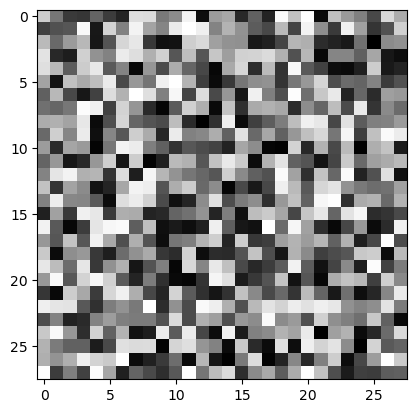

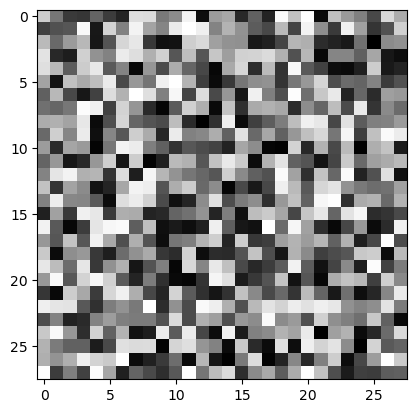

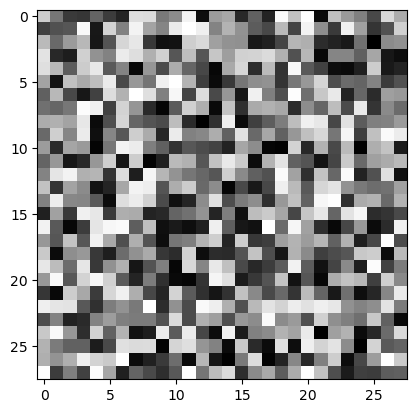

In [80]:
input_image = torch.rand(3,28,28)
print(input_image.size())

for i in range(0,len(input_image)):
    img = input_image[0].squeeze()

    plt.imshow(img, cmap="gray")

    plt.show()

## nn.Flatten

We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [81]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


## nn.Sequential

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [82]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Linear

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [83]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [84]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")


Before ReLU: tensor([[ 0.4390,  0.2300, -0.3363, -0.9431,  0.0906, -0.1378,  0.2716,  0.0387,
         -0.4681,  0.0927,  0.6127, -0.0531, -0.2481,  0.2586, -0.0270,  0.5453,
         -0.2401,  0.0093, -0.1789, -0.0947],
        [ 0.6639,  0.2188, -0.2369, -0.8736,  0.0778,  0.1491,  0.2682, -0.0215,
         -0.7511, -0.2793,  0.2325, -0.3523, -0.4271,  0.0523, -0.1073,  0.5265,
         -0.0663, -0.3978, -0.0149, -0.0351],
        [ 0.4945,  0.1803,  0.0359, -0.9275, -0.0472,  0.0437,  0.2173,  0.2847,
         -0.5555,  0.1718,  0.5920, -0.2198, -0.1712,  0.0529,  0.0108,  0.5161,
          0.0592, -0.0694, -0.0887, -0.2098]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.4390, 0.2300, 0.0000, 0.0000, 0.0906, 0.0000, 0.2716, 0.0387, 0.0000,
         0.0927, 0.6127, 0.0000, 0.0000, 0.2586, 0.0000, 0.5453, 0.0000, 0.0093,
         0.0000, 0.0000],
        [0.6639, 0.2188, 0.0000, 0.0000, 0.0778, 0.1491, 0.2682, 0.0000, 0.0000,
         0.0000, 0.2325, 0.0000, 0.0000, 0.0523, 0.00

Above all, this transformation simplifies all returns as either a probabilty or a non-occurence, so to speak

### nn.Softmax

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [51]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model Parameters

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [29]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0088,  0.0003,  0.0353,  ..., -0.0226,  0.0101,  0.0076],
        [-0.0183,  0.0080,  0.0146,  ..., -0.0334, -0.0332,  0.0089]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0024, -0.0148], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0377, -0.0029,  0.0300,  ...,  0.0188,  0.0129,  0.0017],
        [-0.0196,  0.0192,  0.0137,  ..., -0.0157, -0.0270,  0.0048]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

GANs are composed of two models trained in unison. The first model, the generator, takes in some random input and tries to output something that looks like our training data. The second model, the discriminator, takes in training data and generated data and tries to distinguish the fake generated data from the real training data. What makes this framework interesting is that these models are trained together. As the discriminator gets better at recognizing fake images this learning is passed to the generator and the generator gets better at generating fake images. To overuse an analogy the generator is to the discriminator as a counterfeiter is to FBI investigators. One tries to forge data, the other tries to distinguish forgeries from the real deal.

This framework has produced a ton of super interesting results in the last few years from translating horses to zebras, to creating deep fakes, to imagining up wholly new images. In this tutorial we aren’t going to do anything as interesting as those but this should give you all of the background you need in order to successfully implement a GAN of your own from scratch : ). Let’s get started.

Problem Definition

Imagine that we have a data set of all even numbers between zero and 128. This is a subset of a much bigger distribution of data, the integers, with some specific properties, much like how human faces are a subset of all images of living things. Our generator is going to take in random noise as an integer in that same range and learn to produce only even numbers.

Before getting into the actual model let’s build out our data set. We are going to represent each integer as it’s unsigned seven bit binary representation. So the number 56 is 0111000. We do this because:

    It is very natural to pass in a binary vector to a machine learning algorithm, in this case, a neural network.
    It is easy to see if the model is generating even numbers by looking at the lowest bit. If it’s a one the number is odd, if it’s a zero the number is even.

To start let’s write a function which converts any positive integer to its binary form as a list.

In [14]:
from typing import List
import math
import numpy as np

def create_binary_list_from_int(number = int):
    if number < 0 or type(number) is not int:
        raise ValueError("Only Positive integers are allowed")

    return [int(x) for x in list(bin(number))[2:]]

print(create_binary_list_from_int(99))

[1, 1, 0, 0, 0, 1, 1]


With this we can make a function which will generate random training data for us on the fly.

In [15]:
def generate_even_data(max_int, batch_size):
    # Get the number of binary places needed to represent the maximum number
    max_length = int(math.log(max_int, 2))

    # Sample batch_size number of integers in range 0-max_int
    sampled_integers = np.random.randint(0, int(max_int / 2), batch_size)

    # create a list of labels all ones because all numbers are even
    labels = [1] * batch_size

    # Generate a list of binary numbers for training.
    data = [create_binary_list_from_int(int(x * 2)) for x in sampled_integers]
    data = [([0] * (max_length - len(x))) + x for x in data]

    return labels, data
print(generate_even_data(100,16))

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [[1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0], [1, 1, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0], [1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0]])


This function will produce two outputs the first is a list of ones representing that this data is even and comes from our true distribution. The second output is a random even number in binary list form. That’s all we need to start building and training our models!

## Building the Generator and Discriminator Generator

Building the Generator and Discriminator is a snap! Let’s start with the Generator. We need something capable of mapping random seven digit binary input to seven digit binary input that is even. The simplest possible thing here is a single seven neuron layer.

In [43]:
import torch

In [16]:
from typing import Optional
import math
import torch.nn as nn

class Generator(nn.Module):

    def __init__(self, input_length: int):
        super(Generator, self).__init__()
        self.dense_layer = nn.Linear(int(input_length), int(input_length))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense_layer(x))

If we were building a GAN to do something more complicated on say images we would probably train it using random noise generated from a normal distribution and gradually upsample and reshape it until it’s the same size as the data we are trying to copy. Since our example is so simple, a single linear layer with a logistic (sigmoid) activation should be enough to map ones and zeros in seven positions to other ones and zeros in seven positions.

Discriminator

The Discriminator is no more complicated than the Generator. Here we need a model to take in a seven digit binary input and output whether or not it is from our real data distribution (is even) or not (is odd or not a number). To accomplish this we use a single neuron model (logistic regression) with a logistic activation (Sigmoid).

In [4]:
class Discriminator(nn.Module):
    def __init__(self, input_length: int):
        super(Discriminator, self).__init__()
        self.dense = nn.Linear(int(input_length), 1);
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense(x))

That’s it, we’ve built the two models which we will train in unison. Now for the tricky part of GAN training, the training. We need to link these models up in a way that can propagate the gradients around correctly.

Training the Model

Training GANs can seem a bit confusing at first because we need to update two models with every bit of input and we need to be careful about how we do that. So to break it down, we pass two batches of data to our model at every training step. One batch is random noise which will cause the generator to create some generated data, and the second batch is composed solely of data from our true distribution. Throughout the training description, I will reference line numbers in the final training code gist below, not the Github repository.

In [5]:
import math

import torch
import torch.nn as nn


def train(max_int: int = 128, batch_size: int = 16, training_steps: int = 500):
    input_length = int(math.log(max_int, 2))

    # Models
    generator = Generator(input_length)
    discriminator = Discriminator(input_length)

    # Optimizers
    generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
    discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

    # loss
    loss = nn.BCELoss()

    for i in range(training_steps):
        # zero the gradients on each iteration
        generator_optimizer.zero_grad()

        # Create noisy input for generator
        # Need float type instead of int
        noise = torch.randint(0, 2, size=(batch_size, input_length)).float()
        generated_data = generator(noise)

        # Generate examples of even real data
        true_labels, true_data = generate_even_data(max_int, batch_size=batch_size)
        true_labels = torch.tensor(true_labels).float()
        true_data = torch.tensor(true_data).float()

        # Train the generator
        # We invert the labels here and don't train the discriminator because we want the generator
        # to make things the discriminator classifies as true.
        generator_discriminator_out = discriminator(generated_data)
        generator_loss = loss(generator_discriminator_out, true_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Train the discriminator on the true/generated data
        discriminator_optimizer.zero_grad()
        true_discriminator_out = discriminator(true_data)
        true_discriminator_loss = loss(true_discriminator_out, true_labels)

        # add .detach() here think about this
        generator_discriminator_out = discriminator(generated_data.detach())
        generator_discriminator_loss = loss(generator_discriminator_out, torch.zeros(batch_size))
        discriminator_loss = (true_discriminator_loss + generator_discriminator_loss) / 2
        discriminator_loss.backward()
        discriminator_optimizer.step()

Train the Generator

Let’s start by training the generator. This consists of:

    Creating random noise. (Line 27)
    Generating new “fake” data by passing the noise to the generator (Line 28)
    Get the predictions from the discriminator on the “fake” data (Line 38)
    Calculate the loss from the discriminator’s output using labels as if the data were “real” instead of fake. (Line 39)
    Backpropagate the error through just the generator. (Lines 40–41)

Notice how in step four we use true labels instead of fake labels for calculating the loss. This is because we are training the generator. The generator should be trying to fool the discriminator so when the discriminator makes a mistake and says the generated output is real (predicts 1) then the gradients should be small, when the discriminator acts correctly and predicts that the output is generated (predicts 0) the gradients should be big. This is why we only propagate the gradients through the generator at this step, because we inverted the labels. If we trained the entire model like this either the generator would learn the wrong thing or the discriminator would.
Train the Discriminator

Now it’s time to update the weights in our discriminator. We do that in a few steps:

    Pass in a batch of only data from the true data set with a vector of all one labels. (Lines 44–46)
    Pass our generated data into the discriminator, with detached weights, and zero labels. (Lines 49–50)
    Average the loss from steps one and two. (Line 51)
    Backpropagate the gradients through just the discriminator. (Lines 52–53)

The discriminator is trying to learn to distinguish real data from “fake” generated data. The labels while training the discriminator need to represent that, i.e. one when our data comes from the real data set and zero when it is generated by our generator. We pass in those two batches in steps (1) and (2) above and then average the loss from the two batches. It’s important to note that when passing in the generated data we want to detach the gradients. We do this because we are not training the generator we are just focused on the discriminator. Once all of that is done we backpropagate the gradients in only the discriminator and we are done.

Wrapping Up

That’s it! We’ve built our entire GAN. Wrap that in a training loop with some gradient zeroing at each step and we’re ready to roll. If we look at the output of our generator at various training steps we can see it converging to only creating even numbers which is exactly what we wanted!

0   : [47, 3, 35, 1, 16, 56, 39, 16, 3, 1]
50  : [2, 35, 34, 34, 38, 2, 34, 43, 3, 43]
100 : [42, 43, 106, 38, 35, 42, 35, 42, 43, 106]
200 : [108, 106, 106, 42, 106, 42, 106, 106, 42, 96]

At step zero we have 7/10 odd numbers in our sample and at step 200 10/10 of our samples are even numbers! That’s a successful generator and it only took ~50 lines of real Python code!

What Next?

As you’ve probably guessed there are some other tricks for training a GAN which generates non trivial output. Some immediate things to try if you want to make this model work on real data like images are:

    The Generator will probably need to be a bit deeper and scale up the noise to the size of the real data. You can do this using transposed convolutions or upsampling layers.
    Change the noise input to the generator to be Gaussian
    Increase the depth of the discriminator so that its capacity for prediction is better.
    Train for much much longer and monitor the loss.

As a good next step try and implement the DCGAN architecture. This code will get you 90% of the way there. Once you’ve done that and made some fun images like those in the introduction, try and improve them by playing around with training hyper parameters. A good list of things to try when training real GANs can be found here.